In [2]:
!pip install matplotlib numpy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 4.2 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 11.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 10.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.9 MB 5.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/12.9 MB 4.4 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.9 MB 3.8 MB/s eta 0:00:03
   ----------- ----------------

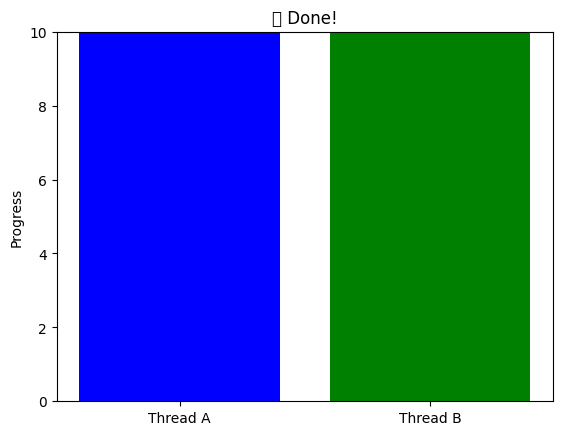

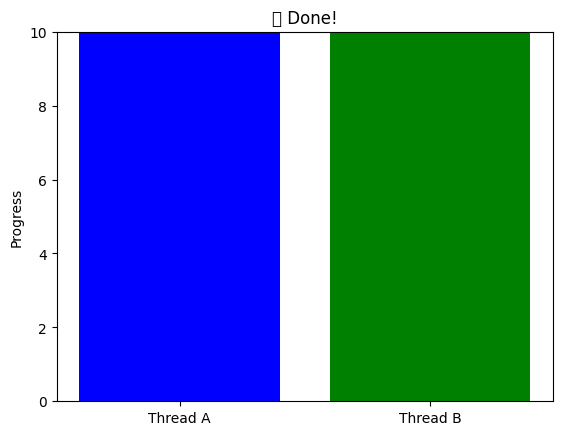

In [4]:
import threading
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np

# Shared progress dictionary
progress = {"A": 0, "B": 0}
done = {"A": False, "B": False}
lock = threading.Lock()

# Thread worker function
# 模擬一個會進行 10 次迴圈的工作，每次等待 delay (秒)後更新自己的進度。
# 使用 lock 來保護對共享資源（如 progress 與 done 字典）的寫入，避免多執行緒間的競爭條件（race condition）。
# 每次進度更新都會印出目前執行緒的進度。
def thread_worker(name, delay):
    for i in range(1, 11):
        # 每次迴圈都會暫停 delay 秒，模擬工作耗時（例如 I/O 操作）
        time.sleep(delay)

        # 使用 lock（通常是 threading.Lock() 的實例）保護 progress 字典的寫入。
        # 「這個執行緒的當前進度是 i」，並記錄到 progress 這個共用的字典中。 例如：progress['A'] = 3
        with lock:
            progress[name] = i
        print(f"{name} updated to {i}")

    # 當 10 次迴圈執行完畢後，再次使用 lock，將這個執行緒在 done 字典中標記為已完成。例如：done['A'] = True
    # 其他主執行緒可依此知道這個執行緒已經完成任務
    with lock:
        done[name] = True

# Visualization updater
def visual_updater():
    while not all(done.values()):
        with lock:
            values = [progress["A"], progress["B"]]
        clear_output(wait=True)
        plt.bar(["Thread A", "Thread B"], values, color=["blue", "green"])
        plt.ylim(0, 10)
        plt.title("Live Thread Progress")
        plt.ylabel("Progress")
        display(plt.gcf())
        time.sleep(0.2)
    # Final update
    with lock:
        values = [progress["A"], progress["B"]]
    clear_output(wait=True)
    plt.bar(["Thread A", "Thread B"], values, color=["blue", "green"])
    plt.ylim(0, 10)
    plt.title("✅ Done!")
    plt.ylabel("Progress")
    display(plt.gcf())

# Start threads and visualizer
threading.Thread(target=thread_worker, args=("A", 0.5), daemon=True).start()
threading.Thread(target=thread_worker, args=("B", 0.8), daemon=True).start()
visual_updater()
